Software for managing and analysing light curves of variable stars, coming from different surveys.

## Imports

In [39]:
# Import libraries
import os

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.timeseries import LombScargle

from lcanalyzer import *

## Params

In [40]:
plot_band_labels = ["u", "g", "r", "i", "z", "y"]
plot_band_colors = {
    "u": "#56b4e9",
    "g": "#008060",
    "r": "#ff4000",
    "i": "#850000",
    "z": "#6600cc",
    "y": "#000000",
}
plot_band_symbols = {"u": "o", "g": "^", "r": "v", "i": "s", "z": "*", "y": "p"}

## Load the data

In [41]:
# Read LC datasets
lc_datasets = {}
lc_datasets["lsst"] = pd.read_pickle(os.path.join("data", "lsst_RRLyr.pkl"))
lc_datasets["kepler"] = pd.read_csv(os.path.join("data", "kepler_RRLyr.csv"))

In [42]:
# Inspect datasets
lc_datasets["lsst"].head()

,band,ccdVisitId,coord_ra,coord_dec,objectId,psfFlux,psfFluxErr,psfMag,ccdVisitId2,band2,expMidptMJD,zeroPoint
0,y,1032263018,62.462569,-44.11336,1251384969897480052,-515.183603,1697.218490,NaN,1032263018,y,61100.069706,30.602301
1,y,1033987172,62.462569,-44.11336,1251384969897480052,3151.738459,1686.955775,22.653625,1033987172,y,61102.068464,30.606100
2,u,675163080,62.462569,-44.11336,1251384969897480052,183.449123,209.242045,25.741211,675163080,u,60582.247144,30.469101
3,y,443055067,62.462569,-44.11336,1251384969897480052,-704.848327,1624.400086,NaN,443055067,y,60215.203585,30.612801
4,u,466722002,62.462569,-44.11336,1251384969897480052,382.472233,278.926670,24.943500,466722002,u,60261.078221,30.461201


In [43]:
lc_datasets["lsst"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   band         11177 non-null  object 
 1   ccdVisitId   11177 non-null  int64  
 2   coord_ra     11177 non-null  float64
 3   coord_dec    11177 non-null  float64
 4   objectId     11177 non-null  int64  
 5   psfFlux      11177 non-null  float64
 6   psfFluxErr   11177 non-null  float64
 7   psfMag       10944 non-null  float64
 8   ccdVisitId2  11177 non-null  int64  
 9   band2        11177 non-null  object 
 10  expMidptMJD  11177 non-null  float64
 11  zeroPoint    11177 non-null  float32
dtypes: float32(1), float64(6), int64(3), object(2)
memory usage: 1004.3+ KB


In [44]:
lc_datasets["kepler"].head()

,time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,...,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
0,131.512404,10180609.0,78.926155,128,0.001410,653.372470,51.053028,1105,10129629.0,79.186980,...,NaN,NaN,NaN,NaN,653.372470,0.000006,51.053028,0.000063,0.011782,-0.010195
1,131.532839,10013518.0,78.233770,128,0.001411,653.372292,51.053872,1106,9949931.0,78.459984,...,NaN,NaN,NaN,NaN,653.372292,0.000006,51.053872,0.000062,0.011726,-0.010246
2,131.553273,9852474.0,77.673160,128,0.001412,653.372167,51.044559,1107,9783633.0,77.827200,...,NaN,NaN,NaN,NaN,653.372167,0.000006,51.044559,0.000062,0.011575,-0.010089
3,131.573707,9722936.0,77.109710,128,0.001413,653.371408,51.045081,1108,9651452.0,77.313590,...,NaN,NaN,NaN,NaN,653.371408,0.000006,51.045081,0.000062,0.011366,-0.009939
4,131.594142,9717073.0,77.103550,0,0.001414,653.372167,51.052828,1109,9646289.0,77.262634,...,NaN,NaN,NaN,NaN,653.372167,0.000006,51.052828,0.000062,0.011526,-0.010702


In [45]:
lc_datasets["kepler"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             93487 non-null  float64
 1   flux             93218 non-null  float64
 2   flux_err         93218 non-null  float64
 3   quality          93487 non-null  int64  
 4   timecorr         93487 non-null  float64
 5   centroid_col     93264 non-null  float64
 6   centroid_row     93264 non-null  float64
 7   cadenceno        93487 non-null  int64  
 8   sap_flux         93264 non-null  float64
 9   sap_flux_err     93264 non-null  float64
 10  sap_bkg          93264 non-null  float64
 11  sap_bkg_err      93264 non-null  float64
 12  pdcsap_flux      93218 non-null  float64
 13  pdcsap_flux_err  93218 non-null  float64
 14  sap_quality      93487 non-null  int64  
 15  psf_centr1       0 non-null      float64
 16  psf_centr1_err   0 non-null      float64
 17  psf_centr2  

## LSST

### Test period searching

In [249]:
len(lc_datasets["lsst"]["objectId"].unique())

25

In [298]:
LC = lc_datasets["lsst"]["objectId"].unique()[1]
LC = lc_datasets["lsst"][lc_datasets["lsst"]["objectId"] == LC]

In [299]:
bands = {}
for band in plot_band_labels:
    bands[band] = LC["band"] == band

In [300]:
len(LC)

433

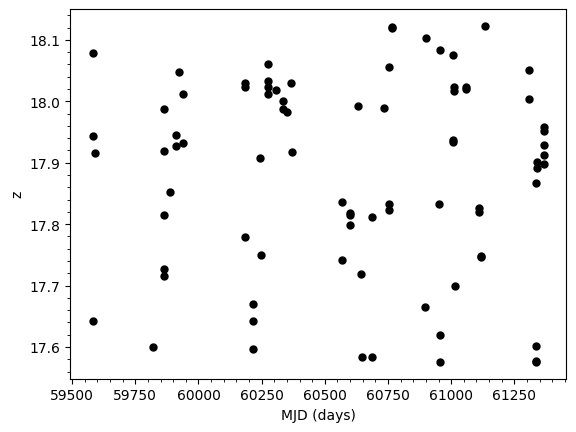

In [301]:
b = "z"
plt.plot(
    LC[bands[b]]["expMidptMJD"],
    LC[bands[b]]["psfMag"],
    "k.",
    ms=10,
)
plt.minorticks_on()
plt.xlabel("MJD (days)")
plt.ylabel(b)
plt.show()

In [302]:
quantile_filter = (LC[bands[b]]["psfMag"] < LC[bands[b]]["psfMag"].quantile(1)) & (
    LC[bands[b]]["psfMag"] > LC[bands[b]]["psfMag"].quantile(0)
)

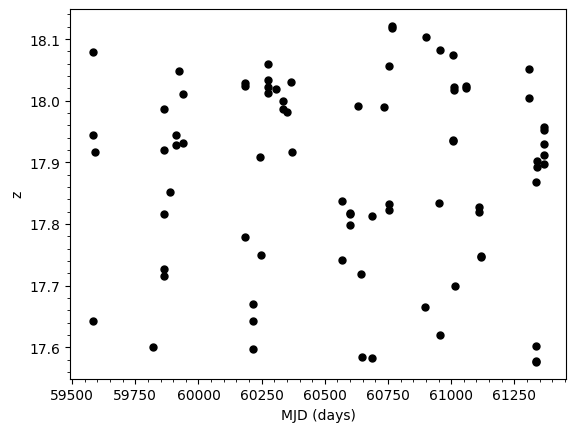

In [303]:
b = "z"
plt.plot(
    LC[bands[b]]["expMidptMJD"][quantile_filter],
    LC[bands[b]]["psfMag"][quantile_filter],
    "k.",
    ms=10,
)
plt.minorticks_on()
plt.xlabel("MJD (days)")
plt.ylabel(b)
plt.show()

In [304]:
mjd_days = {}
mags = {}
for band in plot_band_labels:
    quantile_filter = (LC[bands[band]]["psfMag"] < LC[bands[band]]["psfMag"].quantile(1)) & (
    LC[bands[band]]["psfMag"] > LC[bands[band]]["psfMag"].quantile(0)
    )
    mjd_days[band] = np.array(LC[bands[band]]["expMidptMJD"][quantile_filter]) * u.day
    mags[band] = np.array(LC[bands[band]]["psfMag"][quantile_filter])

In [305]:
min_period = 0.2 * u.day
max_period = 1 * u.day

min_freq_search = 1.0 / max_period
max_freq_search = 1.0 / min_period

In [306]:
frequency = {}
power = {}
for band in plot_band_labels:
    frequency[band], power[band] = LombScargle(mjd_days[band], mags[band]).autopower(
        minimum_frequency=min_freq_search, maximum_frequency=max_freq_search
    )

In [307]:
all_peak_freqs = []

for band in plot_band_labels:
    # find the index with maximum power (= peakbin)
    peakbin = np.argmax(power[band])

    # Store the frequency corresponding to the peak power in each band (band)
    all_peak_freqs.append(frequency[band][peakbin].value)

# Convert the frequencies from a list to and array:
all_peak_freqs = np.array(all_peak_freqs)

# Calculate the mean of the "best-fit" frequencies:
mean_peak_freq = np.mean(all_peak_freqs)

print("Mean frequency:", mean_peak_freq)
print("Mean period:", 1.0 / mean_peak_freq, " days")
print("\nugrizy frequency results:\n", all_peak_freqs)

Mean frequency: 1.7237853774660594
Mean period: 0.5801186232766321  days

ugrizy frequency results:
 [1.26126927 1.8163082  1.81624323 1.81622723 1.81632573 1.81633862]


### Visualization

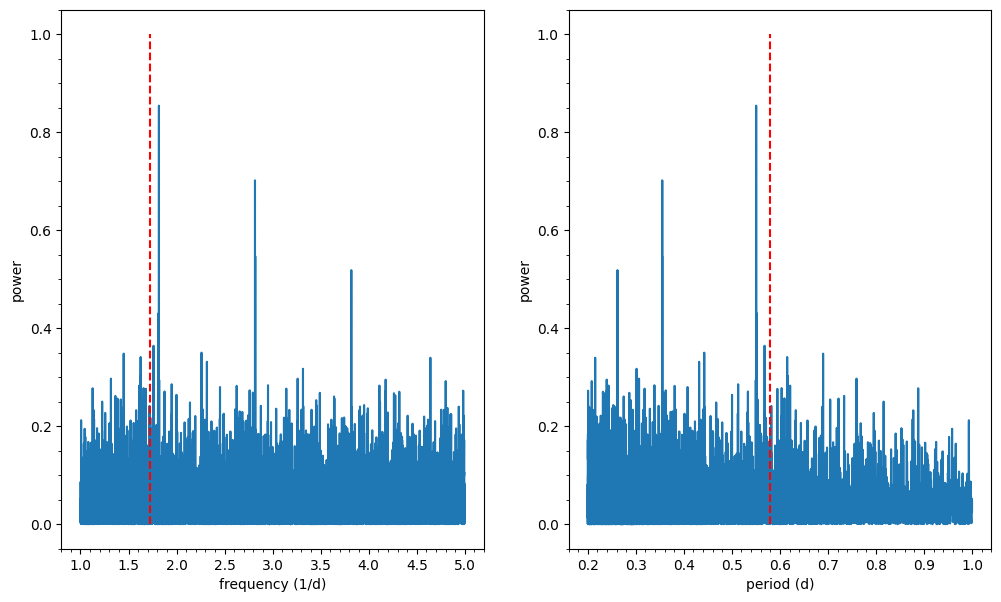

In [308]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))

plt.sca(ax[0])  # set the first axis as current

plt.plot(frequency["r"], power["r"])
plt.vlines(mean_peak_freq, 0, 1, linestyle="--", color="red")
plt.minorticks_on()
plt.xlabel("frequency (1/d)")
plt.ylabel("power")

plt.sca(ax[1])  # set the second axis as current
plt.plot(1 / frequency["r"], power["r"])
plt.vlines(1 / mean_peak_freq, 0, 1, linestyle="--", color="red")
plt.minorticks_on()
plt.xlabel("period (d)")
plt.ylabel("power")
plt.show()

In [312]:
best_period = 1 / 1.81624323

In [313]:
mjd_norm = {}
phase = {}

# Number of elapsed periods since the first measurement:
t0 = np.min(mjd_days["g"].value)

for band in plot_band_labels:
    mjd_norm[band] = (mjd_days[band].value - t0) / best_period

    # Calculate phase by using the modulus function:
    phase[band] = np.mod(mjd_norm[band], 1.0)

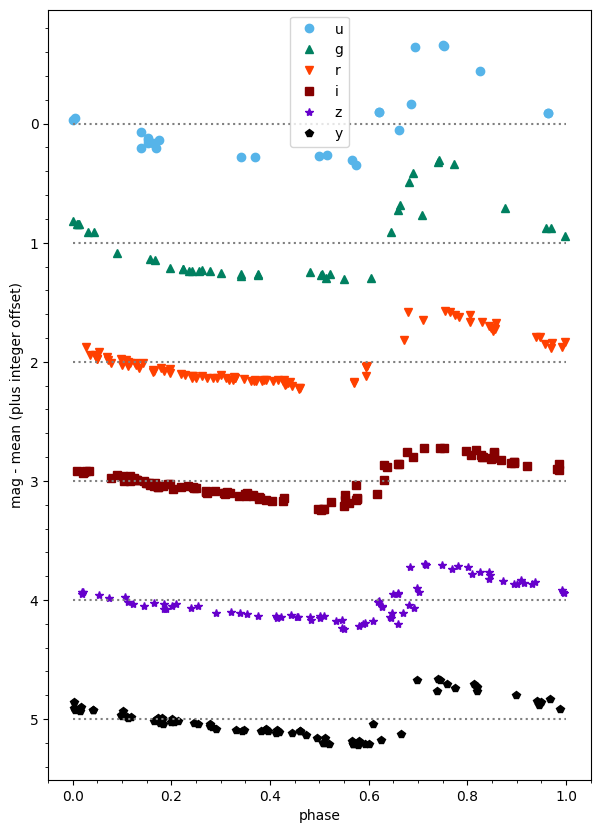

In [314]:
fig = plt.figure(figsize=(7, 10))  # create a matplotlib.pyplot figure

i = 0

for band in plot_band_labels:
    plt.plot(
        phase[band],
        mags[band] - np.mean(mags[band]) + i,
        plot_band_symbols[band],
        color=plot_band_colors[band],
        label=band,
    )
    plt.hlines(i, 0, 1, linestyle=":", color="Gray")
    i += 1

plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("phase")
plt.ylabel("mag - mean (plus integer offset)")
plt.minorticks_on()
plt.show()

## Kepler

### Test period searching

In [65]:
len(lc_datasets["kepler"])

93487

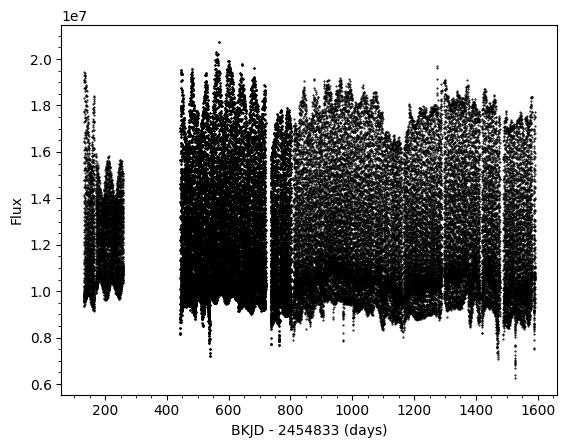

In [66]:
plt.plot(
    list(lc_datasets["kepler"]["time"]), list(lc_datasets["kepler"]["flux"]), "k.", ms=1
)
plt.minorticks_on()
plt.xlabel("BKJD - 2454833 (days)")
plt.ylabel("Flux")
plt.show()

In [67]:
min_period = 0.2 * u.day
max_period = 1 * u.day

min_freq_search = 1.0 / max_period
max_freq_search = 1.0 / min_period

In [68]:
# band NaNs from flux
bkjd_days = (
    np.array(lc_datasets["kepler"]["time"][~np.isnan(lc_datasets["kepler"]["flux"])])
    * u.day
)
flux = np.array(lc_datasets["kepler"]["flux"][~np.isnan(lc_datasets["kepler"]["flux"])])

frequency_kepler, power_kepler = LombScargle(bkjd_days, flux).autopower(
    minimum_frequency=min_freq_search, maximum_frequency=max_freq_search
)

In [69]:
# find the index with maximum power (= peakbin)
peakbin_kepler = np.argmax(power_kepler)

# Store the frequency corresponding to the peak power in each band (band)
peak_freq_kepler = frequency[peakbin_kepler].value

print("Best frequency:", peak_freq_kepler)
print("Best period:", 1.0 / peak_freq_kepler, " days")

Best frequency: 1.6369621454510546
Best period: 0.610887675551261  days


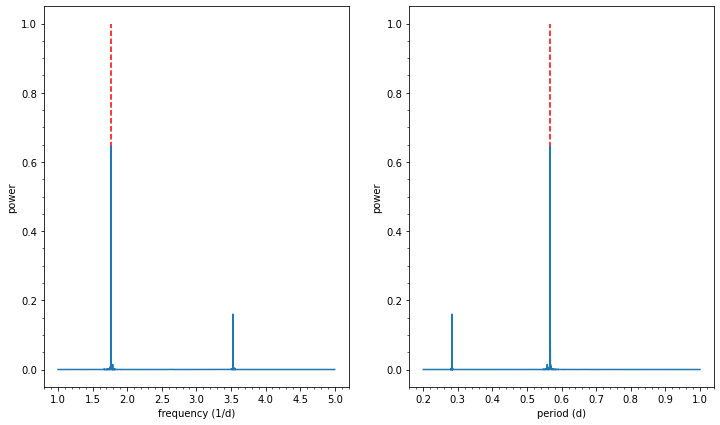

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))

plt.sca(ax[0])  # set the first axis as current

plt.plot(frequency, power)
plt.vlines(peak_freq, 0, 1, linestyle="--", color="red")
plt.minorticks_on()
plt.xlabel("frequency (1/d)")
plt.ylabel("power")

plt.sca(ax[1])  # set the second axis as current
plt.plot(1 / frequency, power)
plt.vlines(1 / peak_freq, 0, 1, linestyle="--", color="red")
plt.minorticks_on()
plt.xlabel("period (d)")
plt.ylabel("power")
plt.show()

In [18]:
best_period = 1 / peak_freq

In [19]:
# Number of elapsed periods since the first measurement:
t0 = np.min(bkjd_days.value)

bkjd_norm = (bkjd_days.value - t0) / best_period

# Calculate phase by using the modulus function:
phase = np.mod(bkjd_norm, 1.0)

### Visualization

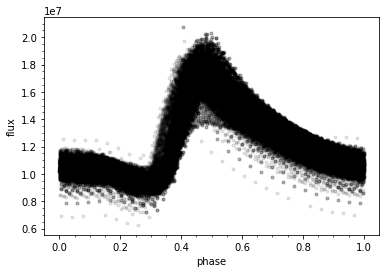

In [20]:
fig = plt.figure()  # create a matplotlib.pyplot figure

plt.scatter(phase, flux, marker=".", c="k", alpha=0.1)

plt.xlabel("phase")
plt.ylabel("flux")
plt.minorticks_on()
plt.show()

## Periods for all sources in LSST dataset

In [218]:
min_period = 0.2 * u.day
max_period = 1 * u.day

min_freq_search = 1.0 / max_period
max_freq_search = 1.0 / min_period

In [219]:
bands = {}
for band in plot_band_labels:
    bands[band] = LC["band"] == band

In [220]:
len(lc_datasets["lsst"]["objectId"].unique())

25

In [246]:
def filter_outliers(LC,upper_quantile=0.99,lower_quantile=0.01):
    quantile_filter = (LC["psfMag"] < LC["psfMag"].quantile(upper_quantile)) & (LC["psfMag"] > LC["psfMag"].quantile(lower_quantile))
    LC = LC[quantile_filter]
    return LC

In [243]:
def calc_period(LC):
    LC = filter_outliers(LC)
    mjd_days = np.array(LC["expMidptMJD"]) * u.day
    mags = np.array(LC["psfMag"])
    frequency, power = LombScargle(mjd_days, mags).autopower(
        minimum_frequency=min_freq_search, maximum_frequency=max_freq_search
    )
    peakbin = np.argmax(power)
    return 1.0 / frequency[peakbin].value

In [244]:
band = "g"
periods = []
for sid in source_ids:
    period = {"sid": sid}
    source_band_filter = (lc_datasets["lsst"]["band"] == band) & (
        lc_datasets["lsst"]["objectId"] == sid
    )
    LC = lc_datasets["lsst"][source_band_filter]
    period["period"] = calc_period(LC)
    periods.append(period)

periods = pd.DataFrame.from_records(periods)

In [237]:
periods = periods.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

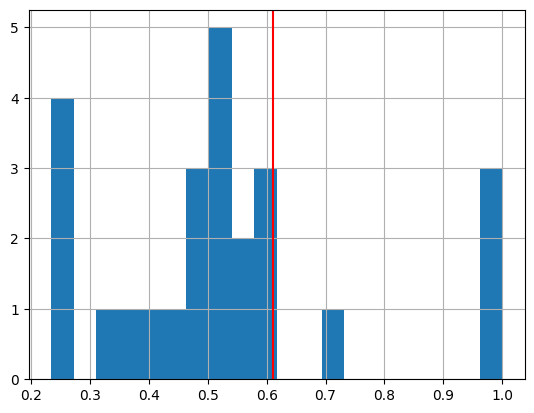

In [238]:
periods["period"].hist(bins=20)
plt.axvline(1.0 / peak_freq_kepler, c="r")

In [227]:
def phase_lc(LC, period):
    mjd_days = np.array(LC["expMidptMJD"]) * u.day
    
    # Number of elapsed periods since the first measurement:
    t0 = np.min(mjd_days.value)

    mjd_norm = (mjd_days.value - t0) / period

    # Calculate phase by using the modulus function:
    phase = np.mod(mjd_norm, 1.0)
    return mjd_norm, phase

In [228]:
lc_datasets["lsst"][["objectId", "band", "expMidptMJD", "psfMag"]]

,objectId,band,expMidptMJD,psfMag
0,1251384969897480052,y,61100.069706,NaN
1,1251384969897480052,y,61102.068464,22.653625
2,1251384969897480052,u,60582.247144,25.741211
3,1251384969897480052,y,60215.203585,NaN
4,1251384969897480052,u,60261.078221,24.943500
...,...,...,...,...
11172,2185793931646635508,i,60193.365488,17.060956
11173,2185793931646635508,i,61305.324734,17.413266
11174,2185793931646635508,i,61305.324286,17.564027
11175,2185793931646635508,i,59908.119769,17.054505


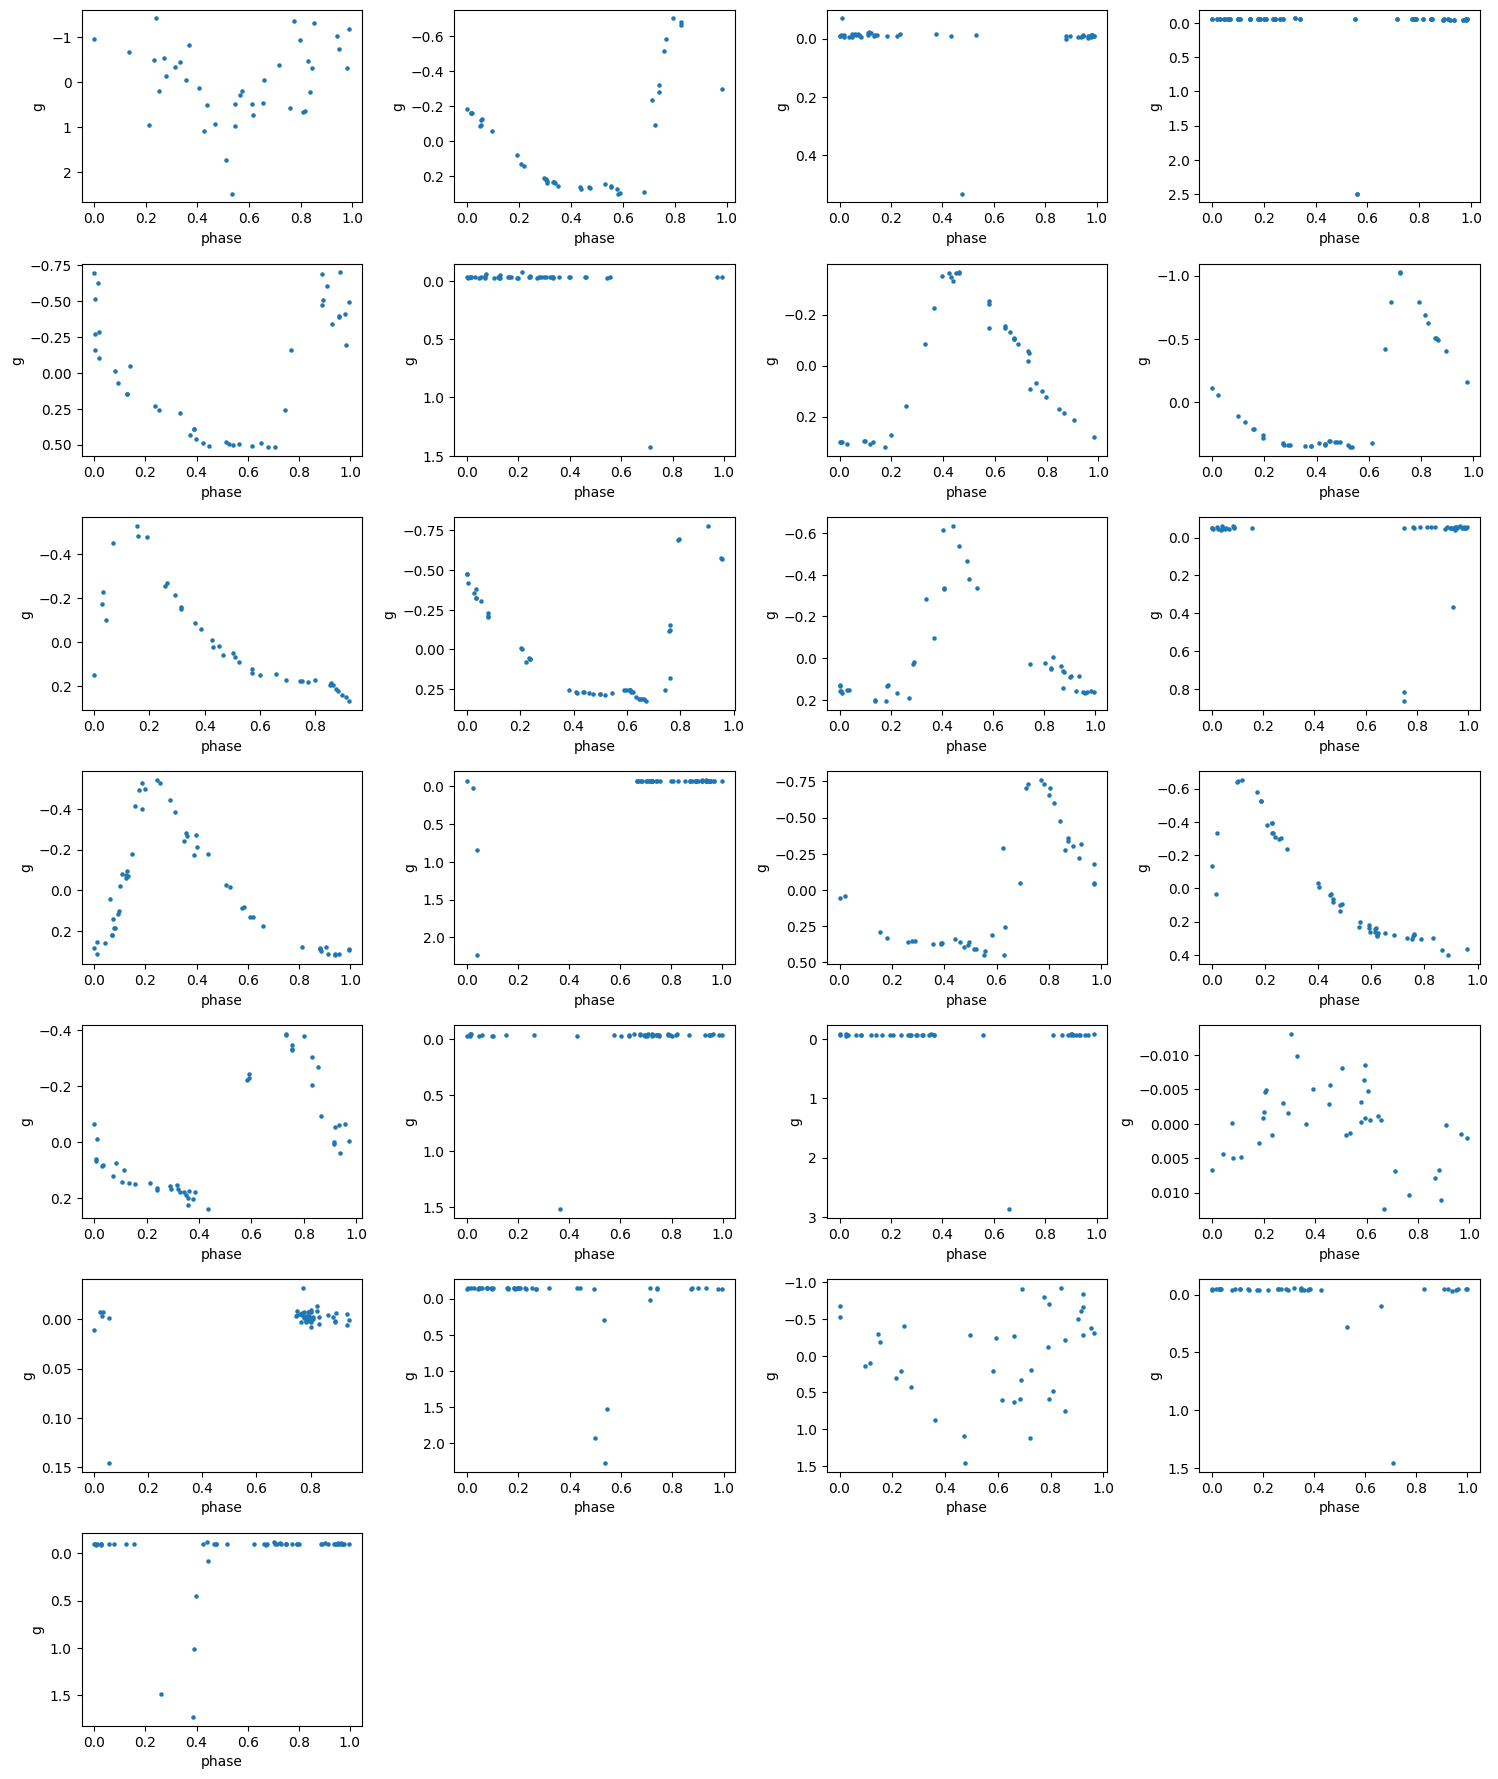

In [248]:
fig = plt.figure(figsize=(15, 20))
for i, sid in enumerate(periods["sid"]):
    ax = fig.add_subplot(8, 4, i + 1)
    source_band_filter = (lc_datasets["lsst"]["band"] == band) & (
        lc_datasets["lsst"]["objectId"] == sid
    )
    LC = lc_datasets["lsst"][source_band_filter]
    LC = filter_outliers(LC)
    mjd_norm, phase = phase_lc(LC, periods.iloc[i]["period"])
    ax.scatter(phase, LC["psfMag"] - LC["psfMag"].mean(), s=5)
    ax.invert_yaxis()
    ax.set_xlabel("phase")
    ax.set_ylabel(band)
plt.tight_layout()